# Task 1

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train = pd.read_csv('/content/drive/My Drive/Assignment_14_dec/train.csv')
test = pd.read_csv('/content/drive/My Drive/Assignment_14_dec/test.csv')
train_label = pd.read_csv('/content/drive/My Drive/Assignment_14_dec/train_label.csv',header=None)
test_label = pd.read_csv('/content/drive/My Drive/Assignment_14_dec/test_label.csv',header=None)

In [3]:
train.shape,test.shape,train_label.shape,test_label.shape

((8708, 9), (2178, 9), (8708, 1), (2178, 1))

# Visualize data using different visualizations to generate interesting insights.

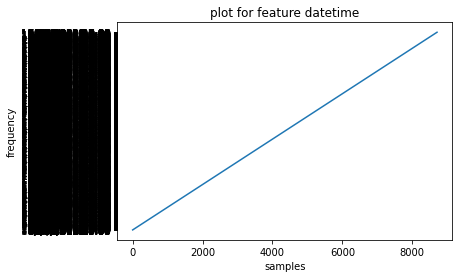

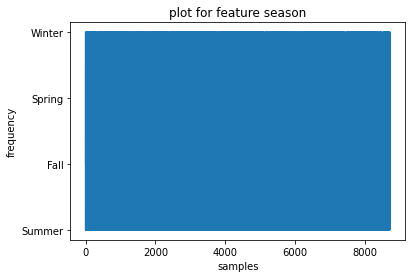

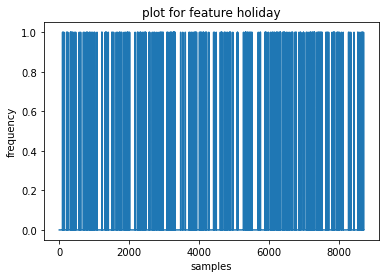

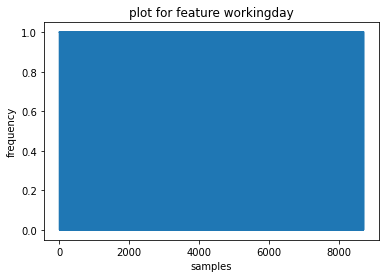

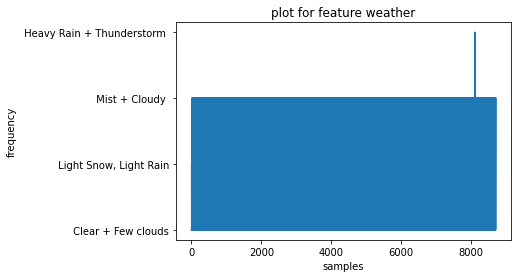

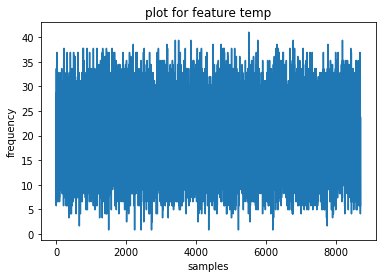

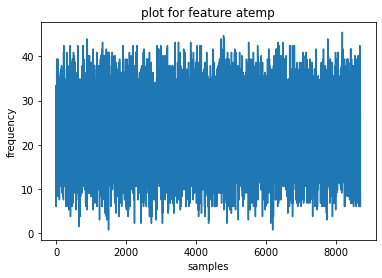

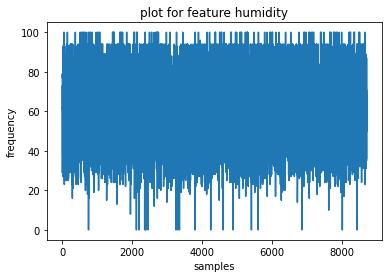

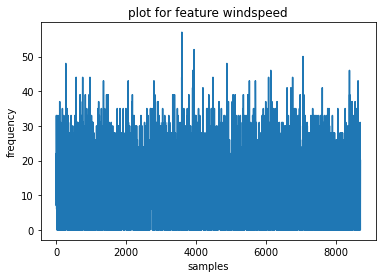

In [4]:
import matplotlib.pyplot as plt

for i in train.columns:
  plt.plot(train[i])
  plt.ylabel('frequency')
  plt.xlabel('samples')
  plt.title('plot for feature '+str(i))
  plt.show()

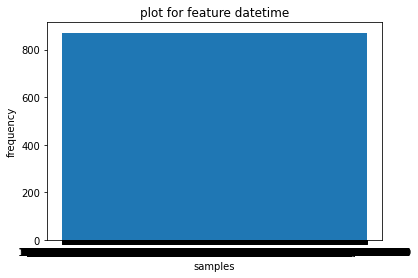

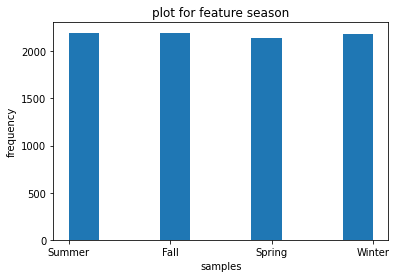

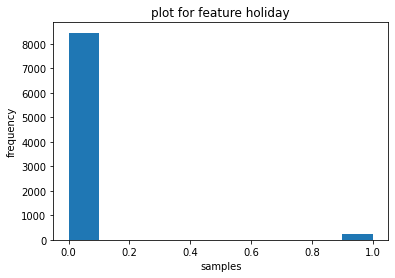

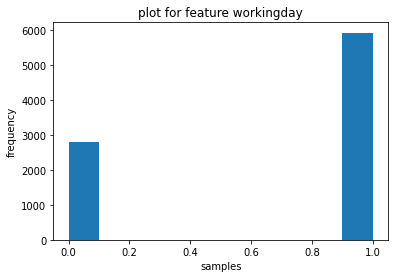

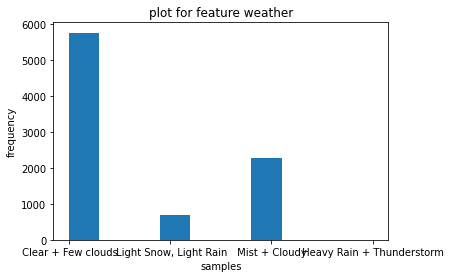

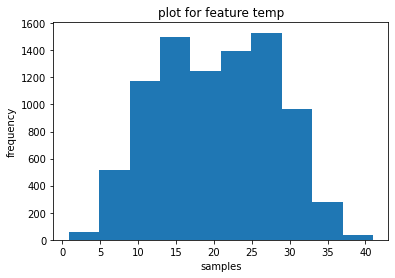

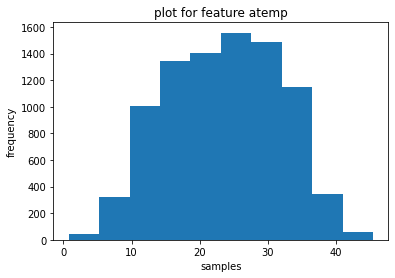

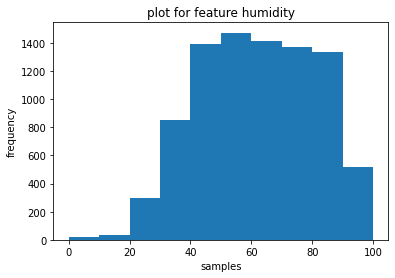

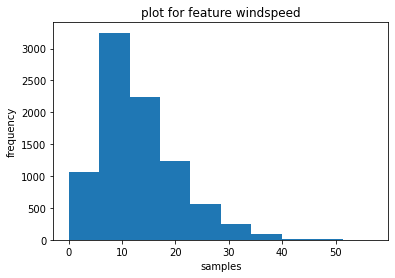

In [5]:
import matplotlib.pyplot as plt

for i in train.columns:
  plt.hist(train[i])
  plt.ylabel('frequency')
  plt.xlabel('samples')
  plt.title('plot for feature '+str(i))
  plt.show()

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   object 
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   object 
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 612.4+ KB


In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


Outlier Analysis

In [8]:
from scipy import stats
from scipy import stats
df = train.select_dtypes(exclude='object')
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]


,holiday,workingday,temp,atemp,humidity,windspeed
0,0,1,22.14,25.760,77,16.9979
1,0,1,28.70,33.335,79,19.0012
2,0,1,5.74,6.060,50,22.0028
3,0,1,13.94,16.665,29,8.9981
4,0,1,30.34,33.335,51,19.0012
...,...,...,...,...,...,...
8702,0,1,10.66,13.635,35,7.0015
8704,0,1,16.40,20.455,87,0.0000
8705,0,1,23.78,27.275,56,8.9981
8706,0,1,11.48,13.635,61,16.9979


# Missing value analysis

In [9]:
train.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool

In [10]:
test.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool

# Visualizing Total_booking Vs other features to generate insights

In [11]:
train_label.columns = ['total_booking']

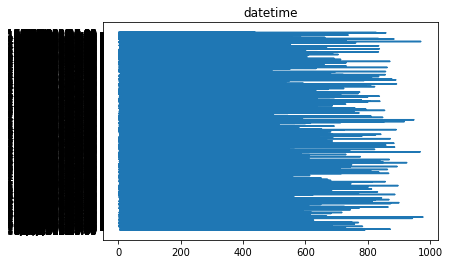

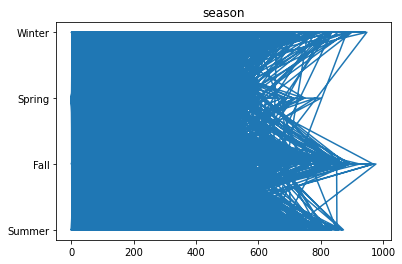

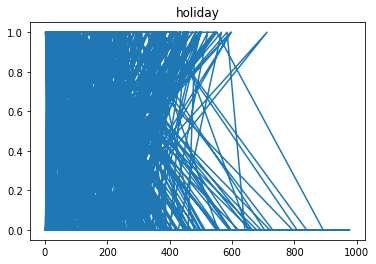

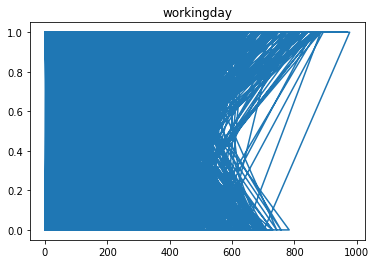

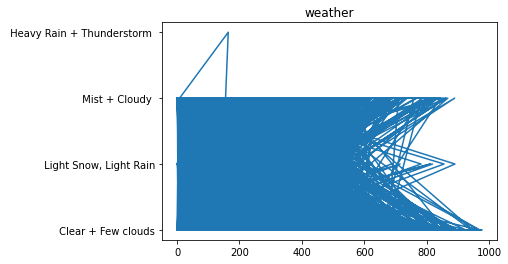

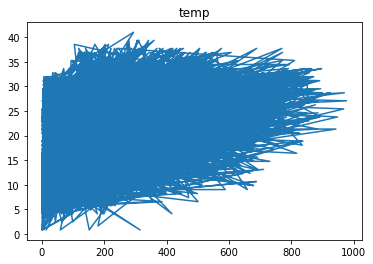

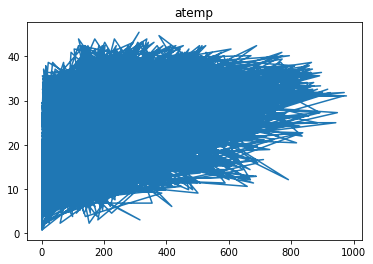

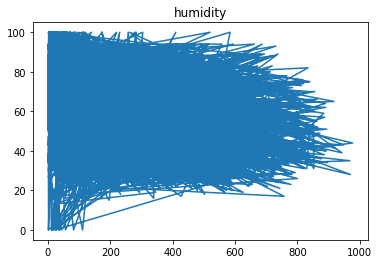

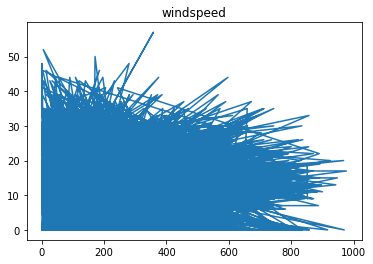

In [12]:
for i in train.columns:
  plt.plot(train_label,train[i])
  plt.title(i)
  plt.show()

# Correlation Analysis

In [13]:
train.corr()

,holiday,workingday,temp,atemp,humidity,windspeed
holiday,1.000000,-0.249755,-0.000165,-0.005526,-0.004567,0.008075
workingday,-0.249755,1.000000,0.032189,0.026168,-0.009282,0.013035
temp,-0.000165,0.032189,1.000000,0.984035,-0.066419,-0.027824
atemp,-0.005526,0.026168,0.984035,1.000000,-0.044206,-0.068911
humidity,-0.004567,-0.009282,-0.066419,-0.044206,1.000000,-0.320346
windspeed,0.008075,0.013035,-0.027824,-0.068911,-0.320346,1.000000


# Task 2:

## 1. Feature Engineering

In [14]:
df_test = test.select_dtypes(exclude='object')
df_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed
0,0,1,21.32,25.000,48,35.0008
1,0,0,23.78,27.275,64,7.0015
2,0,0,11.48,12.120,100,27.9993
3,0,1,25.42,28.790,83,0.0000
4,0,0,25.42,31.060,43,23.9994


In [15]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed
0,0,1,22.14,25.760,77,16.9979
1,0,1,28.70,33.335,79,19.0012
2,0,1,5.74,6.060,50,22.0028
3,0,1,13.94,16.665,29,8.9981
4,0,1,30.34,33.335,51,19.0012



## 2. Grid search

In [16]:
x_train,y_train = df.iloc[:200,:],train_label.iloc[:200,:]

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=3)
logreg_cv.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)




tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.009950248756218905


## 3. Regression Analysis

In [18]:
from sklearn.linear_model import LinearRegression
l=LogisticRegression()

l.fit(x_train,y_train).predict(df_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([221,   6, 139, ..., 129,   3, 360])

## 4. Ensemble Model

In [20]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)

er = VotingRegressor([('lr', r1), ('rf', r2)])
print(er.fit(x_train,y_train).predict(df_test))

[311.03675056 257.41451212  82.05691966 ... 174.26017074 139.04237405
 201.15551379]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
